<a href="https://colab.research.google.com/github/Fordfire337/CS-4410-intro-machine-learning/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

#description and the basic info
print(diabetes.DESCR)

print("Data shape:", diabetes.data.shape)
print("Target shape:", diabetes.target.shape)
print("Feature names:", diabetes.feature_names)


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [2]:
import pandas as pd
pd.set_option('display.precision', 4)

# Build DataFrame
diabetes_df = pd.DataFrame(diabetes.data,
                           columns=diabetes.feature_names)

# target column
diabetes_df["DiseaseProgression"] = pd.Series(diabetes.target)

# View first rows, stats
display(diabetes_df.head())
display(diabetes_df.describe())


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,DiseaseProgression
0,0.0381,0.0507,0.0617,0.0219,-0.0442,-0.0348,-0.0434,-0.0026,0.0199,-0.0176,151.0
1,-0.0019,-0.0446,-0.0515,-0.0263,-0.0084,-0.0192,0.0744,-0.0395,-0.0683,-0.0922,75.0
2,0.0853,0.0507,0.0445,-0.0057,-0.0456,-0.0342,-0.0324,-0.0026,0.0029,-0.0259,141.0
3,-0.0891,-0.0446,-0.0116,-0.0367,0.0122,0.0250,-0.0360,0.0343,0.0227,-0.0094,206.0
4,0.0054,-0.0446,-0.0364,0.0219,0.0039,0.0156,0.0081,-0.0026,-0.0320,-0.0466,135.0


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,DiseaseProgression
count,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,442.0000
mean,-2.5118e-19,1.2308e-17,-2.2456e-16,-4.7976e-17,-1.3815e-17,3.9184e-17,-5.7772e-18,-9.0425e-18,9.2937e-17,1.1303e-17,152.1335
std,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,77.0930
min,-1.0723e-01,-4.4642e-02,-9.0275e-02,-1.1240e-01,-1.2678e-01,-1.1561e-01,-1.0231e-01,-7.6395e-02,-1.2610e-01,-1.3777e-01,25.0000
25%,-3.7299e-02,-4.4642e-02,-3.4229e-02,-3.6656e-02,-3.4248e-02,-3.0358e-02,-3.5117e-02,-3.9493e-02,-3.3246e-02,-3.3179e-02,87.0000
50%,5.3831e-03,-4.4642e-02,-7.2838e-03,-5.6704e-03,-4.3209e-03,-3.8191e-03,-6.5845e-03,-2.5923e-03,-1.9472e-03,-1.0777e-03,140.5000
75%,3.8076e-02,5.0680e-02,3.1248e-02,3.5644e-02,2.8358e-02,2.9844e-02,2.9312e-02,3.4309e-02,3.2432e-02,2.7917e-02,211.5000
max,1.1073e-01,5.0680e-02,1.7056e-01,1.3204e-01,1.5391e-01,1.9879e-01,1.8118e-01,1.8523e-01,1.3360e-01,1.3561e-01,346.0000


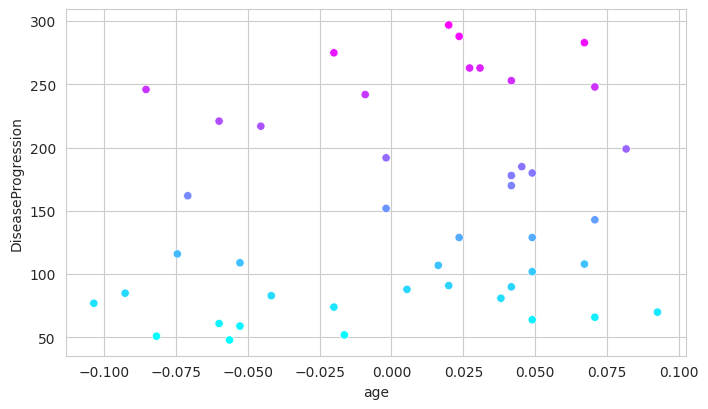

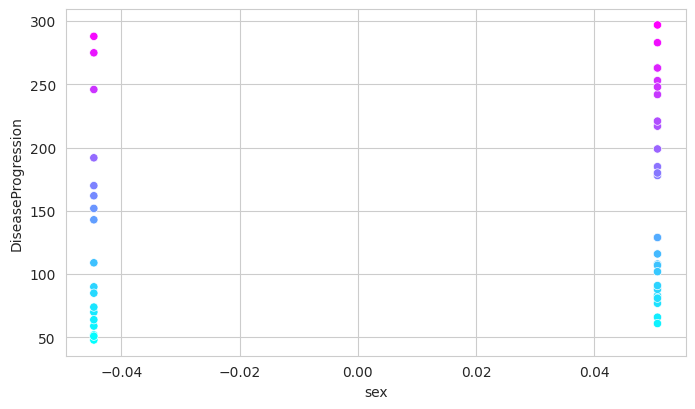

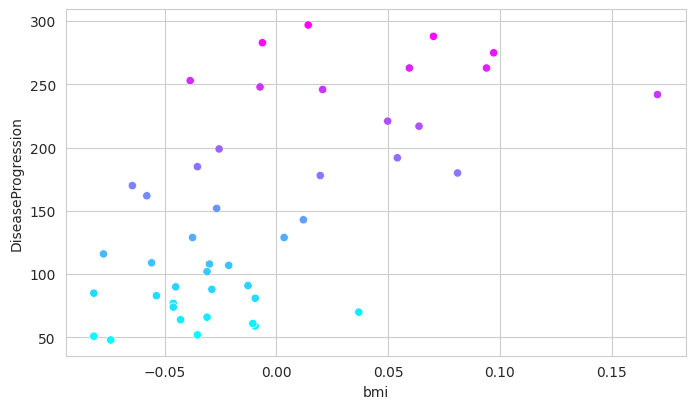

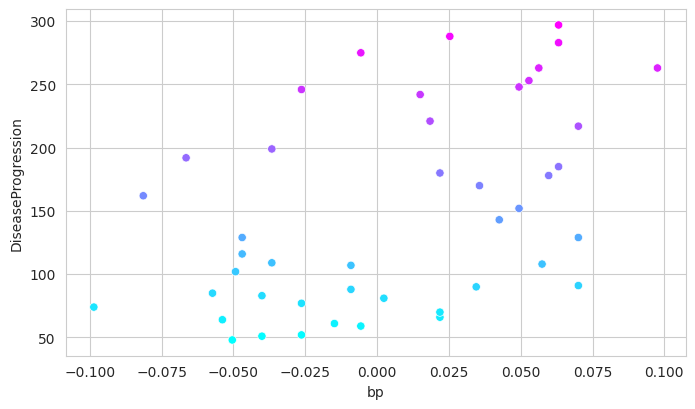

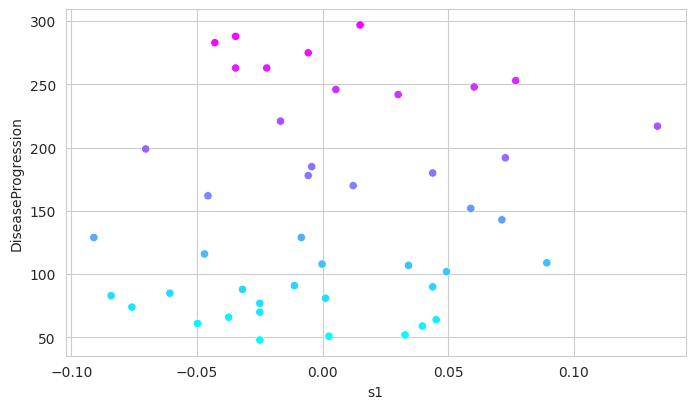

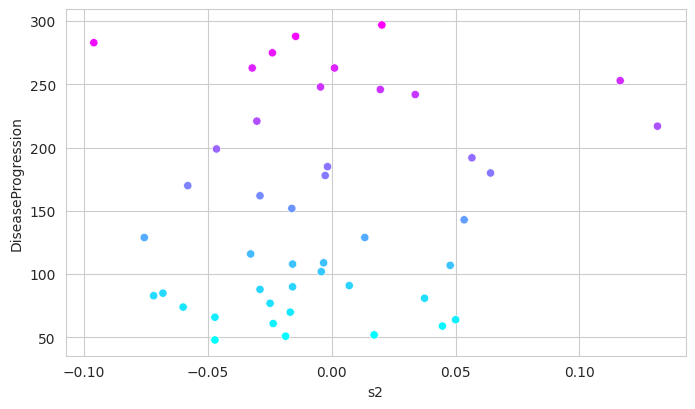

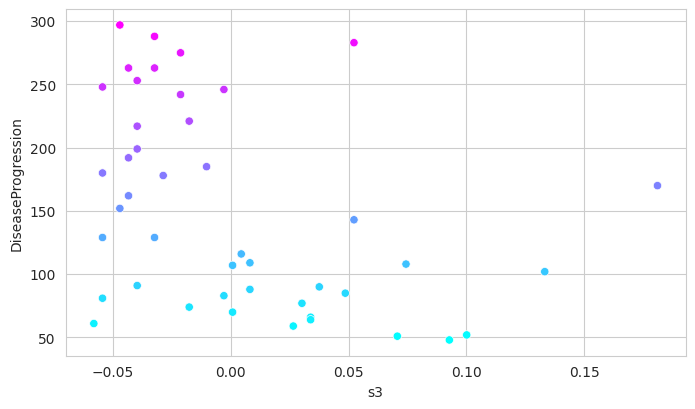

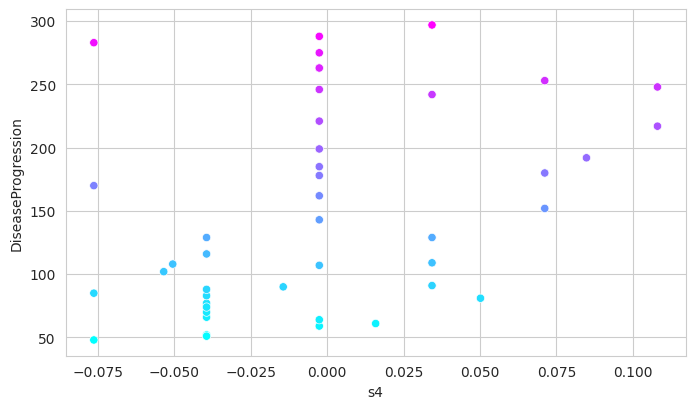

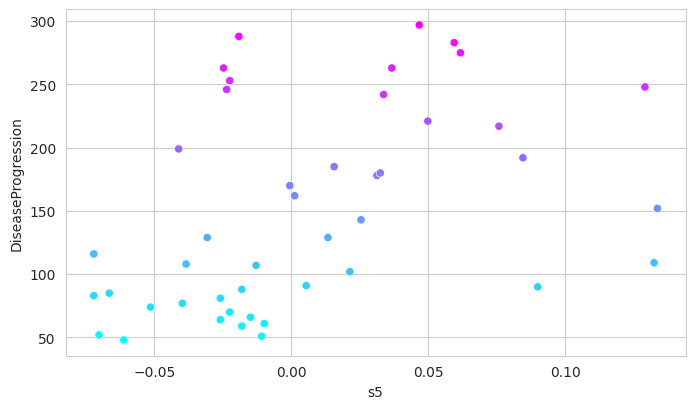

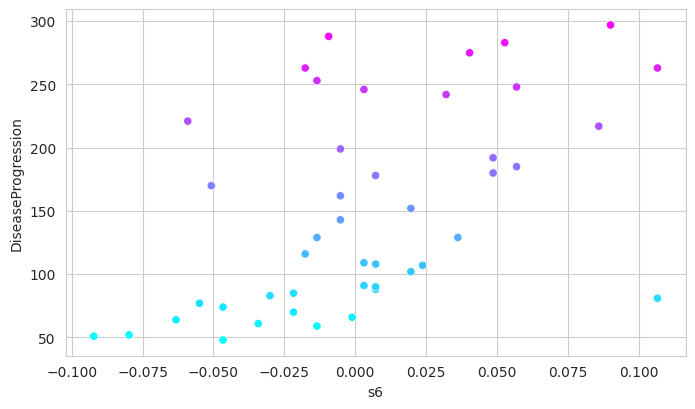

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Take 10% sample for plotting
sample_df = diabetes_df.sample(frac=0.1, random_state=17)

# Scatterplots for each feature
for feature in diabetes.feature_names:
    plt.figure(figsize=(8, 4.5))
    sns.scatterplot(
        data=sample_df,
        x=feature,
        y="DiseaseProgression",
        hue="DiseaseProgression",
        palette="cool",
        legend=False
    )
    plt.show()


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    diabetes.data, diabetes.target, random_state=11
)

print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)

# Train Linear Regression model
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

print("\nModel trained!")


Training set: (331, 10)
Testing set: (111, 10)

Model trained!


In [5]:
print("Intercept:", linear_regression.intercept_)

print("\nCoefficients:")
for i, name in enumerate(diabetes.feature_names):
    print(f"{name:>10}: {linear_regression.coef_[i]}")


Intercept: 152.22822762230342

Coefficients:
       age: -60.21981405677291
       sex: -266.45705232203574
       bmi: 523.0634112596993
        bp: 310.5134699670048
        s1: -336.1614738106944
        s2: 137.3392923842451
        s3: -131.13923283453653
        s4: -1.1492348017315557
        s5: 622.3286855688128
        s6: 60.466457691682535


First 5 predictions: [115.46474836  83.4585369  160.77727376 187.65710274  72.72122197]
First 5 expected values: [ 79.  55. 109. 178.  39.]


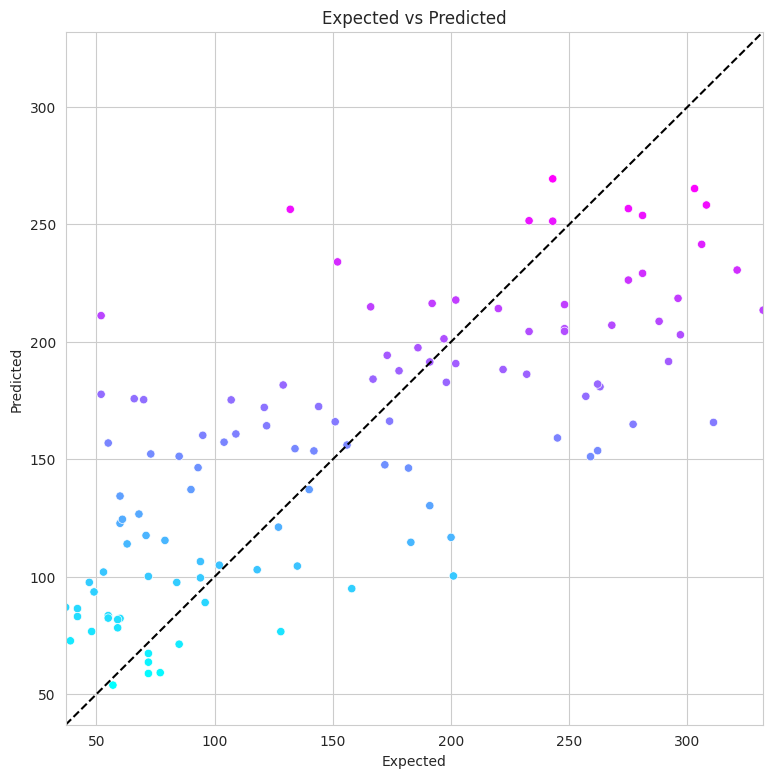

In [6]:
import numpy as np

# Predictions
predicted = linear_regression.predict(X_test)
expected = y_test

print("First 5 predictions:", predicted[:5])
print("First 5 expected values:", expected[:5])

# DataFrame comparison
df = pd.DataFrame({
    "Expected": expected,
    "Predicted": predicted
})

# Scatterplot Expected vs Predicted
plt.figure(figsize=(9, 9))
axes = sns.scatterplot(
    data=df,
    x="Expected",
    y="Predicted",
    hue="Predicted",
    palette="cool",
    legend=False
)

start = min(expected.min(), predicted.min())
end = max(expected.max(), predicted.max())

axes.set_xlim(start, end)
axes.set_ylim(start, end)

plt.plot([start, end], [start, end], "k--")
plt.title("Expected vs Predicted")
plt.show()


In [7]:
from sklearn import metrics

r2 = metrics.r2_score(expected, predicted)
print("R² Score:", r2)


R² Score: 0.5322429620529407


In [8]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.model_selection import KFold, cross_val_score

estimators = {
    "LinearRegression": LinearRegression(),
    "ElasticNet": ElasticNet(),
    "Lasso": Lasso(),
    "Ridge": Ridge()
}

# Cross-validation comparison
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)

    scores = cross_val_score(
        estimator=estimator_object,
        X=diabetes.data,
        y=diabetes.target,
        cv=kfold,
        scoring="r2"
    )

    print(f"{estimator_name:>16}: mean R² = {scores.mean():.3f}")


LinearRegression: mean R² = 0.475
      ElasticNet: mean R² = -0.002
           Lasso: mean R² = 0.339
           Ridge: mean R² = 0.421
